# 1. Otsu(오츠) 알고리즘을 이용한 경계값 선택

otsu threshold: 140.0


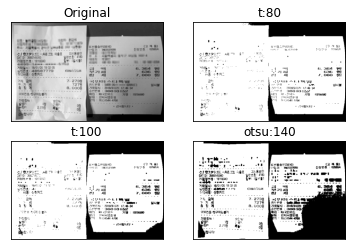

In [ ]:
import cv2
import matplotlib.pylab as plt

#이미지를 그레이 스케일로 읽기
img = cv2.imread('/content/receipt.png',cv2.IMREAD_GRAYSCALE)

#경계값을 80,100으로 임의 지정
_, t_80 = cv2.threshold(img,80,255,cv2.THRESH_BINARY)
_, t_100 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)

#경계값을 지정하지 않고 OTSU 알고리즘 선택

#우선, 그냥 의미없는 경계값 01의 전달은 자동으로 경곗값을 선택
#4번째는 type
t,t_otsu = cv2.threshold(img,-1,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#Otsu 알고리즘으로 선택된 경계
print('otsu threshold:',t)

imgs = {'Original': img,"t:80":t_80,"t:100":t_100,"otsu:%d"%t: t_otsu}

for i, (key,value) in enumerate(imgs.items()):
  plt.subplot(2,2,i+1)
  plt.title(key)
  plt.imshow(value,cmap='gray')
  plt.xticks([])
  plt.yticks([])
plt.show()

여러 번 경계값을 바꿔가며 시도해도 하나의 경계 값을 이미지 전체에 적용해서는 좋은 결과를 얻지 못한다.

--> 그래서 이미지를 여러 영역으로 나누고 주변 픽셀 값만을 가지고 계산하여 경계값 구하기(적응형 스레시홀드)

# 2. 적응형 스레시홀드 사용 시

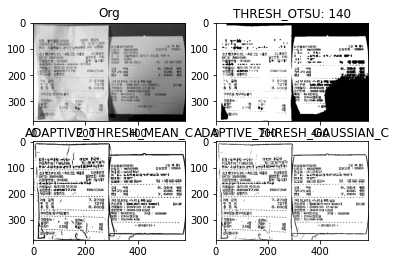

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/receipt.png',cv2.IMREAD_GRAYSCALE)

#img: {ndarray:(377,583)}
#오츠의 알고리즘으로 단일 경계 값을 전체이미지에 적용
ret, th1 = cv2.threshold(img,-1,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)#4번째는 type

#img: {ndarray:(377,583)}
#적응형 스레시홀드를 평균과 가우시안 분포로 각각 적용

#adaptiveThreshold 파라미터 -> 입력 영상, 경곗값을 만족하는 픽셀에 적용할 값, 스레스홀드 적용 방법, 이진 분류, 영역으로 나눌 이웃의 크기, 계산된 경계 값 결과에서 가감할 상수
th2=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 5)
th3=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 5)

imgs = {"Org" : img, "THRESH_OTSU: %d"%ret:th1, 'ADAPTIVE_THRESH_MEAN_C':th2, 'ADAPTIVE_THRESH_GAUSSIAN_C':th3}

for i,(k,v) in enumerate(imgs.items()):
  plt.subplot(2,2,i+1)
  plt.title(k)
  plt.imshow(v,'gray')
plt.show()

그냥 경계값을 Otsu알고리즘으로 계속 구하는 것 보다 adaptive Threshold를 적용하는 것이 좋아보인다.

# 3. 영상 합성

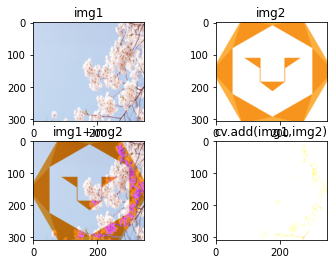

In [ ]:
import cv2
import matplotlib.pylab as plt
#연산에 사용할 이미지 읽기
img1 = cv2.imread('/content/add_flower.png')
img2 = cv2.imread('/content/add_likelion.png')

#이미지 더하기
#그냥 더하기 연산과 OpenCV 더하기 함수를 비교해보자
img3 = img1+img2 # 이 때 2개의 사진의 크기가 맞아야한다.
img4 = cv2.add(img1,img2)

imgs = {'img1':img1, 'img2':img2, 'img1+img2':img3, 'cv.add(img1,img2)':img4}

for i,(k,v) in enumerate(imgs.items()):
  plt.subplot(2,2,i+1)
  plt.imshow(v[:,:,::-1])
  plt.title(k)
plt.show()

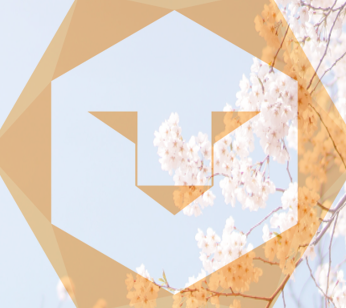

In [ ]:
from google.colab.patches import cv2_imshow
#가중치 알파를 설정해서 사용해 보겠다.
alpha=0.5
#함수를 활용한 방법
#addWeighted 파라미터 -> 합성할 이미지, 지정한 가중치, 합성할 이미지1, 가중치1, 연산 결과에 가감할 함수
dst = cv2.addWeighted(img1,alpha,img2,(1-alpha),0)

#Jupyter만의 코드
#cv2.imshow('cv2.addWeighted',dst)
cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 4. 트랙바 만들기

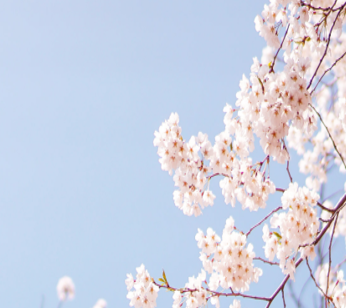

error: ignored

In [ ]:
win_name = 'Alpha blending' #창 이름
trackbar_name = 'fade' # 트랙바 이름

#cv2.getTrackbarPos('trackbar','win_name') -> 찾고자 하는 트랙바 이름, 트랙바가 있는 창의 이름

#트랙바 이벤트 핸들러 함수
def onChange(x):
  alpha = x/100
  dst = cv2.addWeighted(img1,1-alpha,img2,alpha,0)
  #cv2.imshow(win_name,dst)
  cv2_imshow(dst)

cv2_imshow(img1)
#colab에서는 사용되지 않는다. -> jupyter에서는 가능
cv2.createTrackbar(trackbar_name, win_name, 0 ,100, onChange)
#트랙바 이름, 트랙바를 표시할 창 이름, 트랙바 초기 값, 트랙바 최대 값, 트랙바 이벤트 핸들러 함수
cv2.waitKey()
cv2.destroyAllWindows()

# 5. 영상 빼기

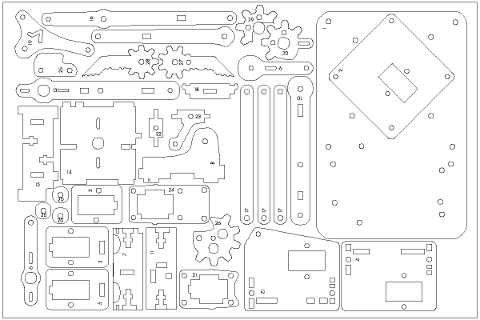

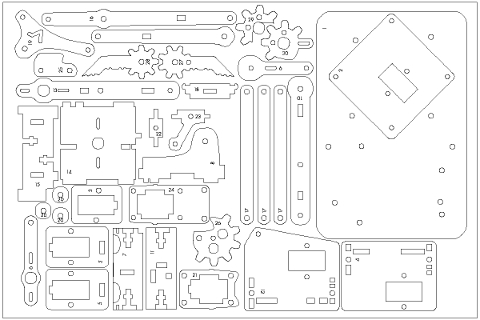

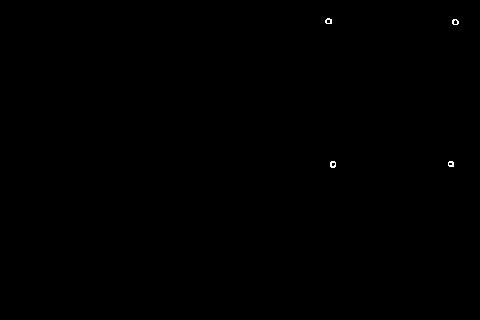

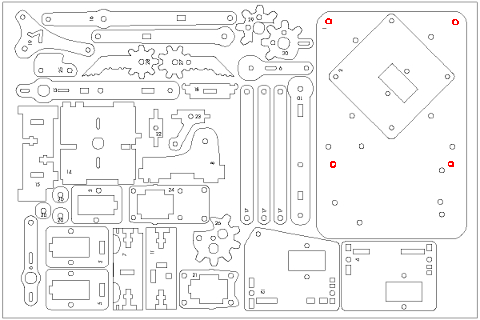

In [ ]:
#그레이 스케일로 변환
img1 = cv2.imread('/content/floor_plan_A.jpg')
img2 = cv2.imread('/content/floor_plan_B.jpg')
img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#두 영상의 절대값 차 연산
diff = cv2.absdiff(img1_gray,img2_gray)

#차 영상을 극대화하기 위해 Threshold 처리 및 컬러 변환
#차이를 극대화하기 위해서 1보다 큰 값은 모두 255로 바꿈
_,diff = cv2.threshold(diff,1,255,cv2.THRESH_BINARY)

#색상을 표현하기 위해 컬러 스케일로 전환
diff_red = cv2.cvtColor(diff,cv2.COLOR_GRAY2BGR)

#차이가 발생하는 부분에는 붉은 색으로 전환
diff_red[:,:,2]=0 #2로 하면 붉은 색, 1로 하면 초록색

#두 번째 이미지에 변화 부분 표시
spot = cv2.bitwise_xor(img2,diff_red)
#원본 이미지는 배경이 흰색이므로 255를 가지고 있고 차영상은 차이가 있는
#빨간색 영역을 제외하고는 255이므로 XOR연산을 하면 다른 영역인 도면의 그림과 빨간색으로 표시된 차영상 부분 합성
#서로 다를 때만 참

cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(diff)
cv2_imshow(spot)
cv2.waitKey()
cv2.destroyAllWindows()

# 6. HSV변환 - 신호등 영상

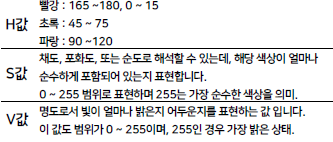

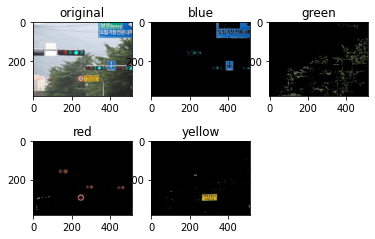

In [ ]:
import numpy as np

#신호등 영상 읽어서 HSV로 변환 
img = cv2.imread('/content/Traffic_light.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) #BGR -> HSV로 전환

#cv2.inRange(): 각 색상 범위별 마스크를 만든다.
#첫 번째 인자의 영상에서 두 번째와 세 번째 인자의 배열 구간에 포함되면
#해당 픽셀의 값으로 255를 할당 -> 아니면 0

#색상별 영역 지정
#np.array([H,S,V])
blue1 = np.array([90,50,50])
blue2 = np.array([120,255,255])
green1 = np.array([45,50,50])
green2 = np.array([75,255,255])
red1 = np.array([0,50,50])
red2 = np.array([15,255,255])
red3 = np.array([165,50,50])
red4 = np.array([180,255,255])
yellow1 = np.array([20,50,50])
yellow2 = np.array([35,255,255])

#색상에 따른 마스크 생성
mask_blue=cv2.inRange(hsv,blue1,blue2)
mask_green=cv2.inRange(hsv,green1,green2)
mask_red=cv2.inRange(hsv,red1,red2)
mask_red2=cv2.inRange(hsv,red3,red4)
mask_yellow=cv2.inRange(hsv,yellow1,yellow2)

#색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img,img,mask=mask_blue)
res_green = cv2.bitwise_and(img,img,mask=mask_green)
res_red1 = cv2.bitwise_and(img,img,mask=mask_red)
res_red2 = cv2.bitwise_and(img,img,mask=mask_red2)
res_red = cv2.bitwise_or(res_red1,res_red2)
res_yellow=cv2.bitwise_and(img,img,mask=mask_yellow)

#결과 출력
imgs = {'original':img,'blue':res_blue,'green':res_green,'red':res_red,'yellow':res_yellow}

for i,(k,v) in enumerate(imgs.items()):
  plt.subplot(2,3,i+1)
  plt.title(k)
  plt.imshow(v[:,:,::-1])
plt.show()

# 7. 모션 감지 CCTV

In [ ]:
#카메라 캡션 장치 준비

a,b,c=None,None,None
cap=cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH,480) # 프레임 폭을 480으로 설정
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,320) #프레임 높이를 320으로 설정

if cap.isOpened(): #캡처 객체 초기화 확인
  ret, a = cap.read() # a 프레임 읽기
  ret, b = cap.read() # b 프레임 읽기
  while ret: 
    #프레임 읽기 정상인 경우만 작동
    ret, c =cap.read() # c 프레임 읽기
    draw = c.copy() #출력 영상에 사용할 복제본
    if not ret:
      #프레임 읽기 정상이 아니라면
      break
    #3개의 영상을 그레이 스케일로 변경
    a_gray = cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)
    b_gray = cv2.cvtColor(b,cv2.COLOR_BGR2GRAY)
    c_gray = cv2.cvtColor(c,cv2.COLOR_BGR2GRAY)

    #a-b, b-c 절대 차 구하기
    diff1 = cv2.absdiff(a_gray,b_gray)
    diff2 = cv2.absdiff(b_gray,c_gray)

    #Threshold로 경계값을 통해 그 이내의 차이는 무시
    thresh=25 #픽셀 값 기준치 설정
    ret, diff1_t = cv2.threshold(diff1, thresh, 255 ,cv2.THRESH_BINARY)
    ret, diff2_t = cv2.threshold(diff2, thresh, 255 ,cv2.THRESH_BINARY)

    #두 개의 차이에 대해서 AND 연산, 두 영상의 차이가 모두 발견되는 경우 발견하기
    diff = cv2.bitwise_and(diff1_t,diff2_t)

    #열림 연산으로 노이즈 제거, 미세한 노이즈 때문에 움직임 영역을 정확히 추출할 수 없어서 추가 코드
    k = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    diff = cv2.morphologyEx(diff, cv2.MORPH_OEPN, k)

    #차이가 발생한 픽셀의 갯수 판단하여 사각형 그리기
    diff_cnt=cv2.countNonZero(diff)
    max_diff=5 #달라진 팩셀 갯수 기준치 
    if diff_cnt>max_diff:
         nzero = np.nonzero(diff) # 0이 아닌 픽셀의 좌표 얻기
         cv2.rectangle(draw,(min(nzero[1]),min(nzero[0])),(max(nzero[1]),max(nzero[0])),(0,255,0),2)
         cv2.putText(draw,"Motion Detected",(10,30),cv2.FONT_HERSHEY_DUPLEX,0.5,(0,0,255))
    #컬러 스케일 영상과 Threshold 영상을 통합해서 출력
    stacked = np.hstack((draw,cv2.cvtColor(diff,cv2.COLOR_GRAY2BGR)))
    cv2_imshow(stacked)
    #다음 비교를 위해 영상 순서 정리
    a=b
    b=c
    if cv2.waitKey(1) & 0xFF == 27:
      #esc를 누르면 이벤트 종료
      break

